# Closest Pair Of Points

Given a list of `points` of coordinates `(x, y)` find the closest pair of `points` that has the minimum distance `d` between points.


### Generate Points

Generate a list of points `n` of coordinates `(x, y)` using the random module. 

In [143]:
import random
import matplotlib.pyplot as plt

# Number of points
n = 100
# Space of dimension sz
sz = 1000
# List of points : tuple(x, y)
points = list()

for i in range(n):
    p = (random.randint(0, sz), random.randint(0, sz))
    # Avoid collision
    if p not in points:
        points.append(p)
    
print(points)

[(927, 276), (532, 830), (983, 192), (283, 314), (585, 131), (896, 326), (604, 469), (903, 498), (585, 200), (43, 111), (551, 85), (621, 223), (110, 339), (366, 292), (773, 442), (814, 346), (673, 583), (395, 605), (97, 978), (189, 903), (442, 197), (975, 178), (1, 826), (64, 607), (211, 759), (168, 299), (279, 374), (575, 356), (555, 976), (109, 777), (690, 621), (369, 323), (947, 708), (25, 433), (680, 686), (733, 333), (492, 207), (316, 977), (60, 521), (680, 218), (205, 486), (54, 707), (511, 983), (212, 286), (787, 643), (346, 519), (620, 56), (647, 519), (756, 472), (845, 506), (721, 504), (653, 568), (440, 247), (370, 967), (679, 43), (682, 558), (58, 484), (657, 596), (613, 603), (482, 945), (307, 612), (44, 265), (784, 826), (702, 37), (623, 46), (4, 30), (742, 118), (26, 446), (917, 359), (127, 666), (425, 366), (175, 17), (537, 27), (739, 427), (94, 313), (793, 717), (174, 925), (972, 357), (890, 511), (778, 690), (23, 415), (405, 221), (629, 719), (351, 956), (118, 89), (74

## Plotting The Points

Plot all the points `p` of coordinates `(x, y)` using `matplotlib`.

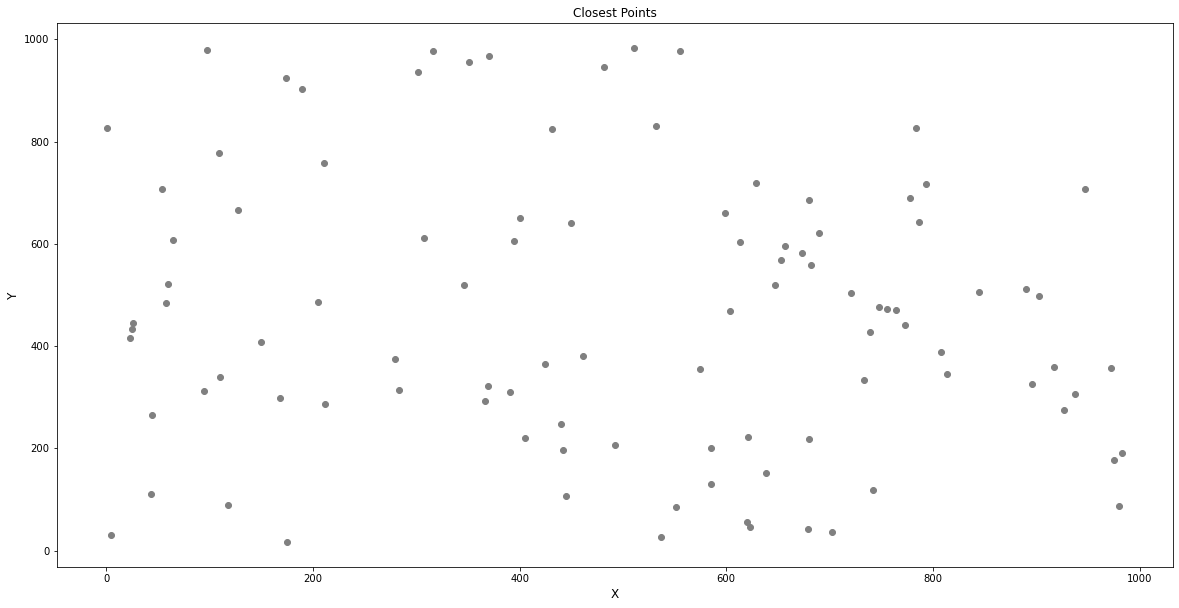

In [150]:
# Unpack points
x, y = zip(*points)

#print(x)
#print(y)

# Change the size of the figure
plt.figure(figsize=(20, 10))
# set x-axis label and specific size
plt.xlabel('X',size=12)
# set y-axis label and specific size
plt.ylabel('Y',size=12)
# set plot title with specific size
plt.title('Closest Points',size=12)
# plt plot
plt.scatter(x, y, color="grey")


plt.show()

## Brute Force Solution O(n^2)

In [145]:
import math

# Euclidian distance
def distance(p1, p2):
    d = math.sqrt(((p2[0] - p1[0])** 2) + ( (p2[1] - p1[1]) ** 2))
    return d


# Brute Force : Time O(n^2)
def closest_brute_force(points):
    min_dist = float("inf")
    p1 = None
    p2 = None

    for i in range(len(points)):
        for j in range(i+1, len(points)):
            d = distance(points[i], points[j])

            if d < min_dist:
                p1 = points[i]
                p2 = points[j]
                min_dist = d
    return p1, p2, min_dist

# Function Call
closest_points = closest_brute_force(points)

print(closest_points)

((756, 472), (764, 470), 8.246211251235321)


(756, 472) (764, 470) 8.246211251235321


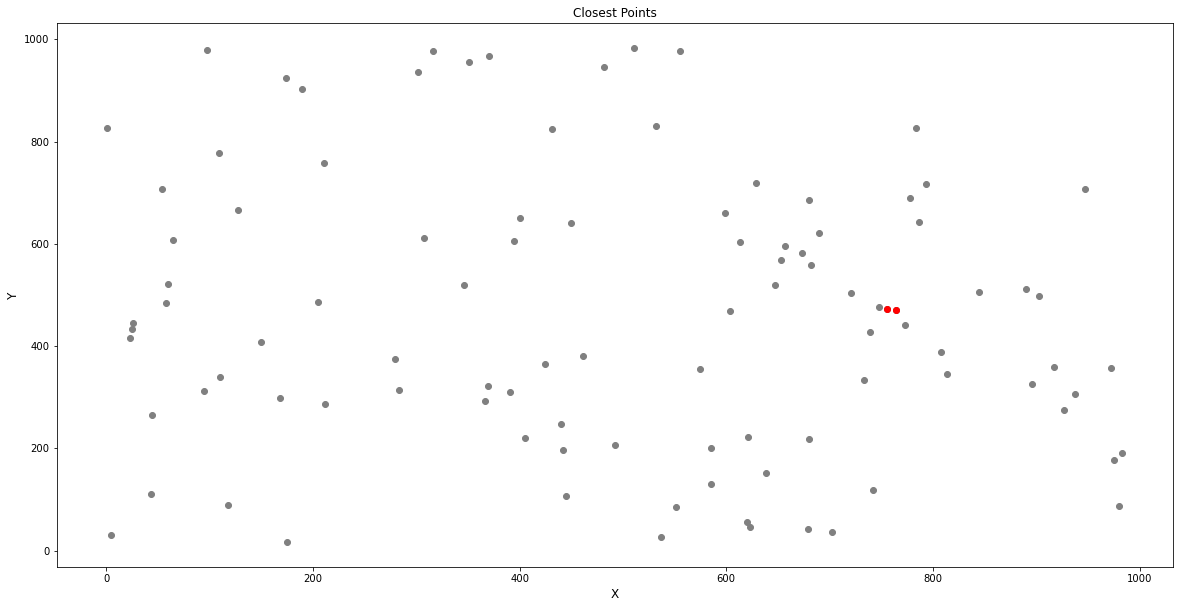

In [151]:
point_a, point_b, distance = closest_points
print(point_a, point_b, distance)
x_a, y_a = point_a
x_b, y_b = point_b


plt.figure(figsize=(20, 10))
plt.xlabel('X',size=12)
plt.ylabel('Y',size=12)
plt.title('Closest Points',size=12)
plt.scatter(x, y, color="grey")
plt.scatter(x_a, y_a, color="red")
plt.scatter(x_b, y_b, color="red")
plt.show()

## Divide And Conquer Solution  O(n log n) 

In [147]:
# Euclidian distance
def distance(p1, p2):
    d = math.sqrt(((p2[0] - p1[0])** 2) + ( (p2[1] - p1[1]) ** 2))
    return d


# Brute Force : Time O(n^2)
def closest_brute_force(points):
    min_dist = float("inf")
    p1 = None
    p2 = None

    for i in range(len(points)):
        for j in range(i+1, len(points)):
            d = distance(points[i], points[j])

            if d < min_dist:
                p1 = points[i]
                p2 = points[j]
                min_dist = d
    return p1, p2, min_dist


def recursive_closest(xsorted, ysorted):
    n = len(xsorted)
    if n <= 3:
        return closest_brute_force(xsorted)
    else:
        midpoint = xsorted[n//2]
        xsorted_left = xsorted[:n//2]
        xsorted_right = xsorted[n//2:]
        ysorted_left = []
        ysorted_right = []
        for point in ysorted:
            ysorted_left.append(point) if (point[0] <= midpoint[0]) else ysorted_right.append(point)
        (p1_left, p2_left, delta_left) = recursive_closest(xsorted_left, ysorted_left)
        (p1_right, p2_right, delta_right) = recursive_closest(xsorted_right, ysorted_right)
        (p1, p2, delta) = (p1_left, p2_left, delta_left) if (delta_left < delta_right) else (p1_right, p2_right, delta_right)
        in_band = [point for point in ysorted if midpoint[0]-delta < point[0] < midpoint[0]+delta]
        for i in range(len(in_band)):
            for j in range(i+1, min(i+7, len(in_band))):
                d = dist(in_band[i], in_band[j])
                if d < delta:
                    print(in_band[i], in_band[j])
                    (p1, p2, delta) = (in_band[i], in_band[j], d)
        return p1, p2, delta


def closest(points):
    xsorted = sorted(points, key=lambda point: point[0])
    ysorted = sorted(points, key=lambda point: point[1])
    return recursive_closest(xsorted, ysorted)

# Function Call
closest_points = closest(points)

print(closest_points)

(58, 484) (60, 521)
(168, 299) (110, 339)
(212, 286) (279, 374)
(189, 903) (174, 925)
(302, 936) (351, 956)
(302, 936) (316, 977)
(351, 956) (316, 977)
(366, 292) (391, 310)
(391, 310) (369, 323)
(351, 956) (370, 967)
(442, 197) (405, 221)
(405, 221) (440, 247)
(532, 830) (482, 945)
(482, 945) (511, 983)
(425, 366) (461, 380)
(551, 85) (585, 131)
(814, 346) (808, 388)
(778, 690) (793, 717)
(903, 498) (890, 511)
(980, 87) (975, 178)
(975, 178) (983, 192)
((756, 472), (764, 470), 8.246211251235321)


(756, 472) (764, 470) 8.246211251235321


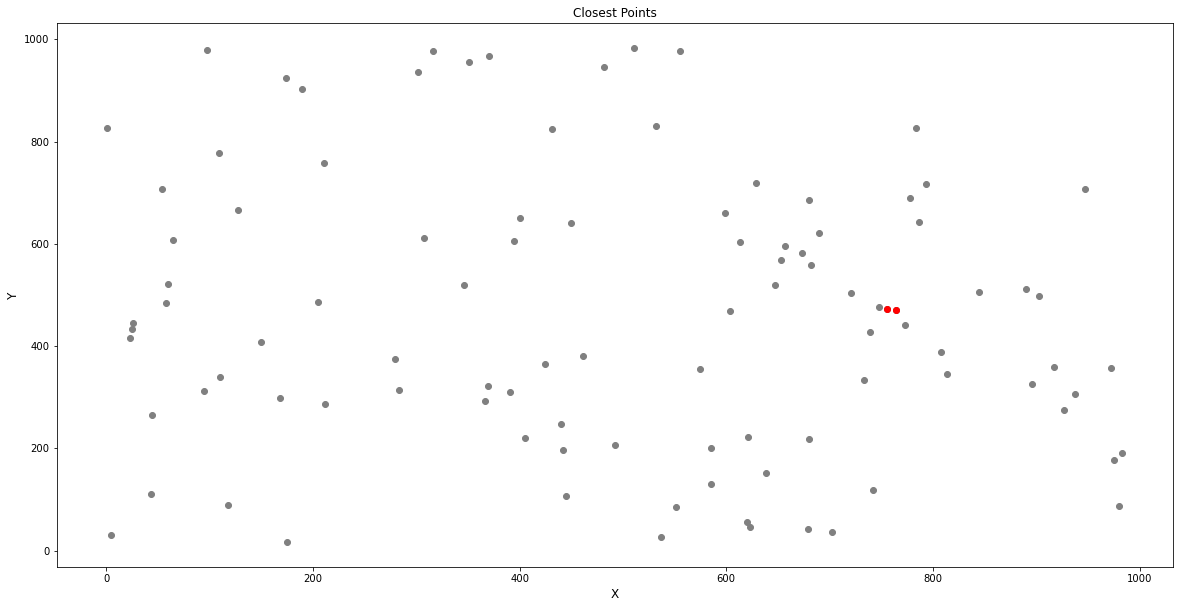

In [152]:
point_a, point_b, distance = closest_points
print(point_a, point_b, distance)
x_a, y_a = point_a
x_b, y_b = point_b

plt.figure(figsize=(20, 10))
plt.xlabel('X',size=12)
plt.ylabel('Y',size=12)
plt.title('Closest Points',size=12)
plt.scatter(x, y, color="grey")
plt.scatter(x_a, y_a, color="red")
plt.scatter(x_b, y_b, color="red")
plt.show()